Import libraries

In [2]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib
import numpy as np


Let's look at a canonical Tamm Plasmon system from [This paper](https://doi.org/10.1364/OE.27.005383).

In [3]:
### dictionary that stores basic properties
### of the multilayer structure you want to simulate
#### thicknesses from Optics Express Paper
dAg = 30e-9
### d1 is TiO2 layers
d1 = 275e-9
### d2 for SiO2 layers
d2 = 160e-9
### ds is for impurity layer (not included here)
ds = 258e-9

### Number of different wavelengths we will consider
N_lambda = 151

tamm_structure = {
        'Temperature': 300,
        'Material_List' : ['Air', 'Ag', 'TiO2', 'SiO2','TiO2','SiO2','TiO2', 'SiO2','TiO2', 'SiO2','TiO2','SiO2','TiO2','SiO2','TiO2', 'SiO2','TiO2', 'SiO2','TiO2','SiO2','TiO2','SiO2','TiO2', 'SiO2','TiO2', 'SiO2','TiO2','SiO2','TiO2','SiO2','TiO2', 'SiO2','TiO2', 'SiO2','TiO2','SiO2','TiO2','SiO2','TiO2', 'SiO2','TiO2', 'SiO2','TiO2','SiO2','TiO2','SiO2','TiO2', 'SiO2','TiO2', 'SiO2','Air'],
        'Thickness_List': [0, dAg, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2,d1, d2, d1, d2, d1, d2, d1, d2,d1, d2, d1, d2, d1, d2, d1, d2,d1, d2, d1, d2, d1, d2, d1, d2,d1, d2, d1, d2, d1, d2, d1, 0],
        'Lambda_List': [1500e-9, 1650e-9, N_lambda],
        'Gradient_List': [1]
     
}

### create instance of Tamm structure
tamm = multilayer(tamm_structure)


We can look at the reflectivity and absorptivity as a function of wavelength at normal incidence; we will see a resonance at around $\lambda = 596$ where the structure goes from highly reflective to highly absorbing.  This is associated with the Tamm plasmon.

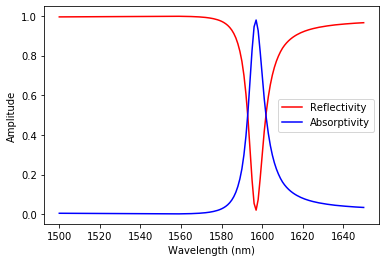

In [4]:

### plot Reflectivity and Absorptivity at normal incidence as a function of wavelength
plt.plot(tamm.lambda_array*1e9, tamm.reflectivity_array, 'red', label='Reflectivity')
plt.plot(tamm.lambda_array*1e9, tamm.emissivity_array, 'blue', label='Absorptivity')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Amplitude')

plt.legend()
plt.show()

Let's look at the Reflectivity and Absorptivity as a function of angle at the resonance wavelength $\lambda = 1596$ nm, we see that at slightly larger incident angles (around $5^{\circ}$), the absorptivity increases even more (and the reflectivity decreases), but then the structure is mostly reflective at larger angles of incidence with a few wiggles possibly indicating additional resonances.

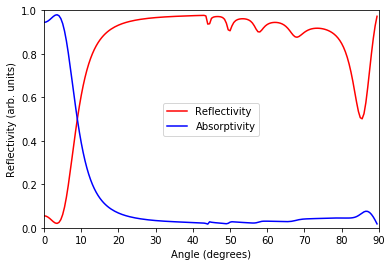

In [5]:
tamm.angular_fresnel(1596e-9)
plt.plot(180/np.pi*tamm.theta_array, tamm.r_vs_theta, 'red', label='Reflectivity')
plt.plot(180/np.pi*tamm.theta_array, tamm.eps_vs_theta, 'blue', label='Absorptivity')

plt.xlabel('Angle (degrees)')
plt.ylabel("Reflectivity (arb. units)")
plt.xlim(0,90)
plt.ylim(0,1)
plt.legend()
plt.show()

We can also take the reflectivity into the complex wave-vector plane, which we can view as complex angle-of-incidence:
\begin{equation}
k_x = n_I k_0 {\rm sin}(\theta_R) + i  n_I k_0 {\rm sin}(\theta_I) 
\end{equation}
where $n_I$ is the refractive index of the material light is incident in ($n_I = 1$ for air in canonical Tamm system), 
$\theta_R$ is the real part of the angle of incidence and $\theta_I$ is the imaginary part of the angle of incidence.  The view espoused [here](https://www.nature.com/articles/srep09929) is that propagating plasmons (surface plasmon polaritons) are associated with a complex angle where the reflectivity goes to infinity.  When we look at the map of reflectivity against complex angle for the Tamm system, we see regions where the reflectivity goes to zero and also where it becomes large (perhaps approaching infinity, though maybe not resolved here).  The color-map of the reflectivity is on a $log_{10}$ scale, and the x-axis goes from $0 \leq \theta_R \leq 90$ degrees and the y-axis from $-5 \leq \theta_I \leq 5$ degrees.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


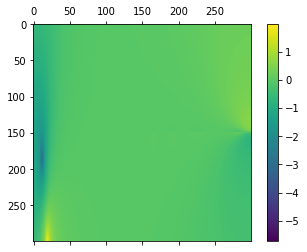

In [6]:
tamm.find_spp(96)


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(tamm.SPP_Map, interpolation='nearest')
fig.colorbar(cax)

xl = np.linspace(0,90,200)
yl = np.linspace(-10,10,200)
fig.show()

Let's now look at the canonical surface plasmon polariton system of a silver film supported on a glass prism with air above.  We will look at visible wavelengths between $500 \leq \lambda \leq 700$ nm and look at the angular dependence right at $\lambda = 606 nm$, which will be relevant for the silver film on the Bragg Reflector we originally considered for the extrinsic plasmon system.

In [7]:
ag_structure = {
        'Temperature': 300,
        'Material_List': ['SiO2', 'Ag', 'Air'],
        'Thickness_List': [0, 30e-9, 0],
        'Lambda_List': [500e-9, 700e-9, 201]
        }

ag = multilayer(ag_structure)

  Gradient will be taken with respect to all layers! 


Let's look at reflectivity and absorptivity as a function of wavelength for normal incidence again; in this case there is no resonnce behavior that occurs at normal incidence.

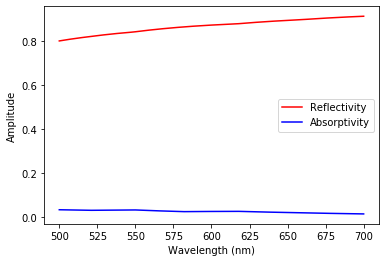

In [8]:
plt.plot(ag.lambda_array*1e9, ag.reflectivity_array, 'red', label='Reflectivity')
plt.plot(ag.lambda_array*1e9, ag.emissivity_array, 'blue', label='Absorptivity')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Amplitude')

plt.legend()
plt.show()

Let's now look at the angle-dependent reflectivity and absorptivity at $\lambda = 606$ nm.

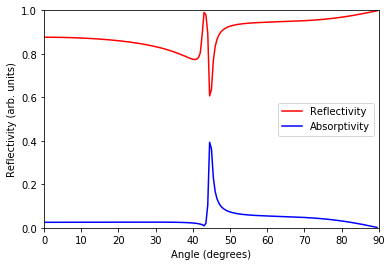

In [9]:
ag.angular_fresnel(606e-9)
plt.plot(180/np.pi*ag.theta_array, ag.r_vs_theta, 'red', label='Reflectivity')
plt.plot(180/np.pi*ag.theta_array, ag.eps_vs_theta, 'blue', label='Absorptivity')

plt.xlabel('Angle (degrees)')
plt.ylabel("Reflectivity (arb. units)")
plt.xlim(0,90)
plt.ylim(0,1)
plt.legend()
plt.show()

The reflectivity dip / absorptivity spike is closely associated with the surface plasmon polariton [though perhaps not identical](https://www.nature.com/articles/srep09929).  We can look at the reflectivity in the complex angle plane again and see the reflectivity go to infinity around this real angle at a positive imaginary angle.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


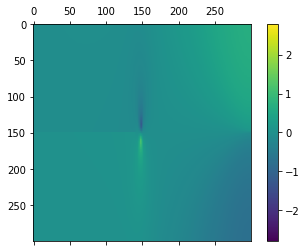

In [10]:
ag.find_spp(106)


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(ag.SPP_Map, interpolation='nearest')
fig.colorbar(cax)
fig.show()

Finally, let's look at the Ag on Bragg Reflector structure considered for the Extrinsic Plasmon system:

In [38]:
d1 = 500e-9/(4*1.50)
d2 = 500e-9/(4*2.4)

ep_structure = {
        'Temperature': 300,
        ### actual materials the structure is made from
        ### values are stored in the attribute self.n
        'Material_List': ['Air', 'Ag','SiO2','TiO2','SiO2','TiO2', 'SiO2','TiO2', 'SiO2','TiO2','SiO2','TiO2','SiO2','TiO2','SiO2','TiO2',  'Air'],
        ### thickness of each layer... terminal layers must be set to zero
        ### values are stored in attribute self.d
        'Thickness_List': [0, 1e-9, d1, d2, d1, d2, d1, d2, d1, d2,d1, d2,d1, d2,d1, d2,  0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [500e-9, 700e-9, 201]
        }

ep = multilayer(ep_structure)

  Gradient will be taken with respect to all layers! 


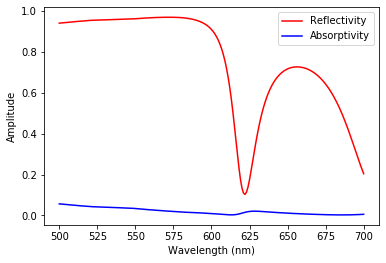

In [34]:
plt.plot(ep.lambda_array*1e9, ep.reflectivity_array, 'red', label='Reflectivity')
plt.plot(ep.lambda_array*1e9, ep.emissivity_array, 'blue', label='Absorptivity')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Given the reflectivity dip at $\lambda = 618$ nm, let's first look at the angle scans at this wavelength... in fact, nothing interesting seems to occur here!

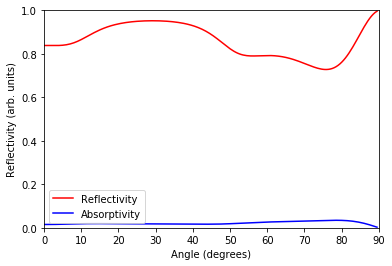

In [28]:
ep.angular_fresnel(618e-9)
plt.plot(180/np.pi*ep.theta_array, ep.r_vs_theta, 'red', label='Reflectivity')
plt.plot(180/np.pi*ep.theta_array, ep.eps_vs_theta, 'blue', label='Absorptivity')

plt.xlabel('Angle (degrees)')
plt.ylabel("Reflectivity (arb. units)")
plt.xlim(0,90)
plt.ylim(0,1)
plt.legend()
plt.show()

/Users/foleyj10/psi4conda/envs/p4env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


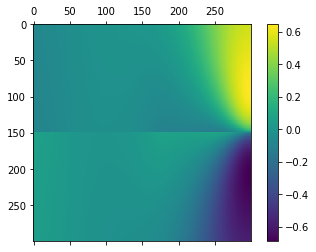

In [42]:
ep.find_spp(118)


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(ep.SPP_Map, interpolation='nearest')
fig.colorbar(cax)
fig.show()

And given that the zero crossing of the effective epsilon occurs around $\lambda = 606 nm$, let's also look at the angle scans at those wavelengths; this appears more interesting!  We can see a few reflectivity dips in the "real" angle scan, and in the complex angle scan, we can vaguely make out a region of high reflectivity just off the real axis. 

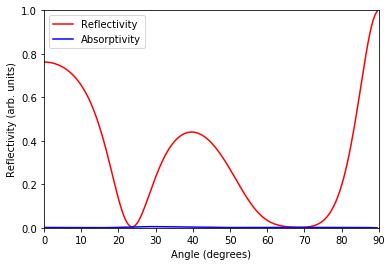

In [39]:
ep.angular_fresnel(606e-9)
plt.plot(180/np.pi*ep.theta_array, ep.r_vs_theta, 'red', label='Reflectivity')
plt.plot(180/np.pi*ep.theta_array, ep.eps_vs_theta, 'blue', label='Absorptivity')

plt.xlabel('Angle (degrees)')
plt.ylabel("Reflectivity (arb. units)")
plt.xlim(0,90)
plt.ylim(0,1)
plt.legend()
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


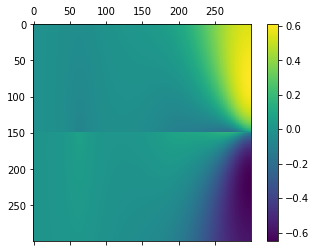

In [16]:
ep.find_spp(106)


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(ep.SPP_Map, interpolation='nearest')
fig.colorbar(cax)
fig.show()

Now we will try to do this with the effective material; even the real angle scan doesn't agree with the Ag on Bragg Reflector... it is perhaps because we need better resolution on the RI right at 606 nm?

9.479166666666666e-07
  Gradient will be taken with respect to all layers! 


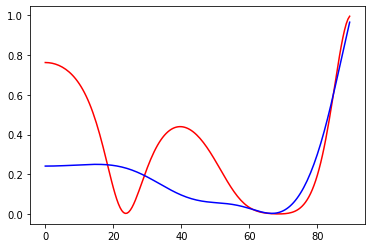

In [40]:
dtot = 7*d1 + 7*d2
print(dtot)
eff_eps_structure_606 = {
        'Temperature': 300,
        'Material_List': ['Air', 'Ag', 'SiO2', 'Air'],
        'Thickness_List': [0, 1e-9, dtot, 0],
        'Lambda_List': [500e-9, 700e-9, 201]
        }

eff_606 = multilayer(eff_eps_structure_606)
eff_606.layer_static_ri(1,7.149095890716119+6.6485645591327245*1j)
eff_606.fresnel()
eff_606.angular_fresnel(606e-9)
ep.angular_fresnel(606e-9)
plt.plot(180/np.pi*ep.theta_array, ep.r_vs_theta, 'red', label='BR + Ag Reflectivity')
plt.plot(180/np.pi*eff_606.theta_array, eff_606.r_vs_theta, 'blue', label='Eff + Ag Reflectivity')
#plt.xlim(0,10)
plt.show()



